### <b>[RQ5]</b> The most influential users are the ones with the highest number of ‚Äúfollowers", you can now look more into their activity.


<b>5.1</b> Plot the top 10 most popular users in terms of followers and their number of posts.


In [35]:
# posts dataset
fields=['profile_id','location_id','post_type','numbr_likes','number_comments']
df_instagram_posts_RQ5=pd.read_csv('~/instagram_posts.csv',sep='\t',usecols=fields)

In [36]:
#profiles dataset
df_instagram_profiles_RQ5 = pd.read_csv('https://adm2022.s3.amazonaws.com/instagram_profiles.zip', delimiter='\t')

In [37]:
#locations dataset
df_instagram_locations_RQ5 = pd.read_csv('https://adm2022.s3.amazonaws.com/instagram_locations.zip', delimiter='\t')

* We start by extracting the top 10 most followed accounts

In [38]:
followers=df_instagram_profiles_RQ5['followers']
followers.nlargest(10)

2880218    285457645.0
2582507     65269440.0
3820939     35339708.0
701965      30689316.0
2414951     30246783.0
2785241     29542143.0
333193      29176804.0
3934581     29042823.0
1311970     26476004.0
1703764     26252169.0
Name: followers, dtype: float64

* We show the dataset of the top 10 most influential users

In [39]:
#top10 profiles by followers
top10=df_instagram_profiles_RQ5[df_instagram_profiles_RQ5.followers >= 26252169.0]
top10.sort_values(['followers'],ascending=False)

sid    profile_id     profile_name      firstname_lastname  \
2880218   336492  2.502532e+07        instagram               Instagram   
2582507   371414  3.416684e+06  victoriassecret       Victoria's Secret   
3820939   337097  2.082449e+07              nba                     NBA   
701965    330376  1.876191e+08     louisvuitton  Louis Vuitton Official   
2414951   292359  2.125507e+09    buzzfeedtasty                   Tasty   
2785241  3437294  4.968651e+08   andresiniesta8          Andres Iniesta   
333193    158690  2.341008e+07               hm                     H&M   
3934581  3615154  2.423993e+07  princessyahrini                Syahrini   
1311970   508140  5.041706e+07     danbilzerian           Dan Bilzerian   
1703764  3513205  9.070254e+08      akshaykumar            Akshay Kumar   

                                               description  following  \
2880218  Bringing you closer to the people and things y...      226.0   
2582507                   Confidence is sexy. #wearitdaily      549.0   
3820939  30 teams, 1 üèÜ\nüëü: @nbakicks \nüìΩ: @nbahistory \...      817.0   
701965    The official Instagram account of Louis Vuitton.        5.0   
2414951  Recipes that will make you say "oh yes!"\nüëá Cl...      298.0   
2785241  Andres Iniesta Official Instagram Account, \nB...      151.0   
333193   Welcome to #HM! Follow us at @HM_Man @HM_Kids ...      403.0   
3934581                                                NaN      835.0   
1311970                               Snapchat: dbilzerian      252.0   
1703764                                       #AkshayKumar        5.0   

           followers  n_posts                                   url  \
2880218  285457645.0   5760.0                    help.instagram.com   
2582507   65269440.0   7355.0             like2b.uy/victoriassecret   
3820939   35339708.0  28816.0               nba.app.link/js6X7SVaxT   
701965    30689316.0   3352.0          on.louisvuitton.com/Like2Buy   
2414951   30246783.0   2791.0                    tasty.co/linkinbio   
2785241   29542143.0    990.0                           mikakus.com   
333193    29176804.0   4566.0                         hm.info/1c9he   
3934581   29042823.0   4719.0  www.youtube.com/c/ThePrincesSyahrini   
1311970   26476004.0   1311.0                         www.ignite.co   
1703764   26252169.0   1173.0                    bit.ly/AliAliBlank   

                                   cts is_business_account  
2880218                            NaN               False  
2582507                            NaN                True  
3820939                            NaN                True  
701965                             NaN                True  
2414951                            NaN                True  
2785241  2019-05-08 23:54:35.377 -0400               False  
333193   2018-05-31 19:33:46.022 -0400                True  
3934581  2019-06-26 15:05:53.411 -0400                True  
1311970                            NaN                True  
1703764  2019-05-14 08:29:29.754 -0400               False

* We now create a barplot showing the number of followers for each one of the most influential users

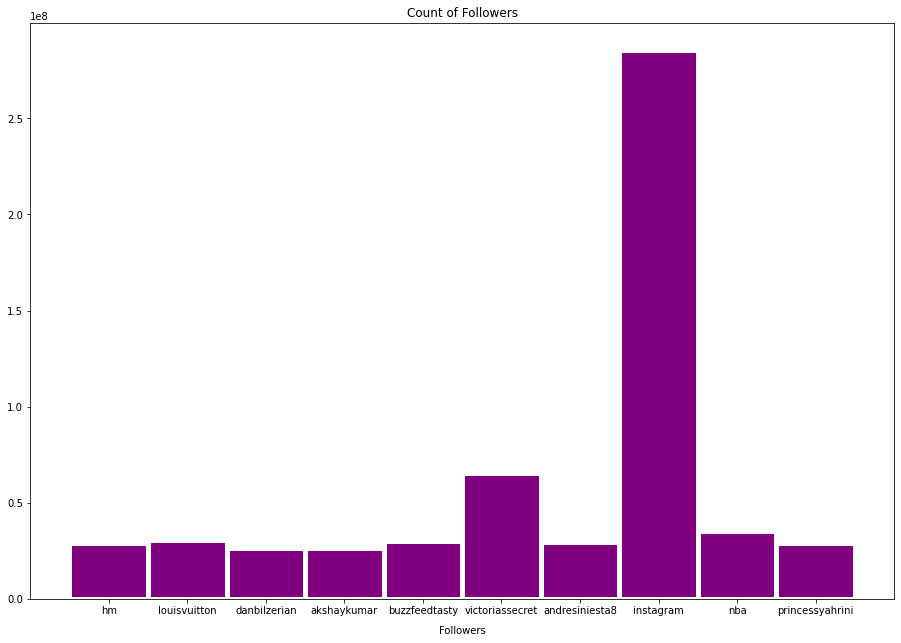

In [40]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
profiles = list(top10['profile_name'])
nfollows = list(top10['followers'])
ax.bar(profiles,nfollows,width=1, edgecolor="white", linewidth=5,color='purple')
plt.xlabel('Followers',labelpad=10)
plt.ylabel('',labelpad=10)
plt.title('Count of Followers')
plt.show()

<b>5.2</b> Who is the most influential user?


In [42]:
#most influential user
df_instagram_profiles_RQ5[df_instagram_profiles_RQ5.followers == 285457645.0] 

sid  profile_id profile_name firstname_lastname  \
2880218  336492  25025320.0    instagram          Instagram   

                                               description  following  \
2880218  Bringing you closer to the people and things y...      226.0   

           followers  n_posts                 url  cts is_business_account  
2880218  285457645.0   5760.0  help.instagram.com  NaN               False

* The most influential user is <b>Instagram


<b>5.3</b> Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited.

* We create a dataframe containing all the posts by the top 10 most influential users

In [44]:
top10_posts=pd.DataFrame(columns=['profile_id'])
for i in [23410080.0,187619120.0,50417061.0,907025384.0,2125506698.0,3416684.0,496865116.0,25025320.0,20824486.0,24239929.0]:
    x=df_instagram_posts_RQ5[df_instagram_posts_RQ5['profile_id']==int(i)]
    top10_posts=pd.merge(top10_posts,x,how='outer')
print(top10_posts)

      profile_id   location_id  post_type  numbr_likes  number_comments
0     23410080.0  3.846191e+08          1     116059.0            642.0
1     23410080.0  2.293029e+08          1      46368.0             88.0
2    187619120.0  5.590714e+06          1     186857.0            867.0
3     50417061.0  2.222444e+08          1     266200.0           3290.0
4     50417061.0  2.368281e+08          1     268732.0           6402.0
..           ...           ...        ...          ...              ...
136   24239929.0  2.130118e+08          1      55010.0              0.0
137   24239929.0  2.130118e+08          1     114315.0              0.0
138   24239929.0  2.130118e+08          1      78974.0              0.0
139   24239929.0  1.906910e+15          1     132116.0              0.0
140   24239929.0  1.906910e+15          1      66185.0              0.0

[141 rows x 5 columns]


* We extract the location_id of each post by top10_posts, then we create a list containing the output.
* We then procede to create top10_loc, a dataframe containing all the locations tagged by the top10 users

In [46]:
loc_id= top10_posts['location_id']
loc_id.apply(lambda x: format(x, 'f'))

0             384619115.000000
1             229302869.000000
2               5590714.000000
3             222244450.000000
4             236828105.000000
                ...           
136           213011753.000000
137           213011753.000000
138           213011753.000000
139    1906910439594849.000000
140    1906910439594849.000000
Name: location_id, Length: 141, dtype: object

In [51]:
cc=[i for i in loc_id]
top10_loc=pd.DataFrame(columns=['sid','name','city'])


#dataframe containing all the locations tagged by the top10 users

for i in range(len(df_instagram_locations_RQ5)):
    if df_instagram_locations_RQ5['id'][i] in cc:
        x=df_instagram_locations_RQ5[df_instagram_locations_RQ5.id == df_instagram_locations_RQ5['id'][i]]
        top10_loc=pd.merge(top10_loc,x,how='outer')

* We now print the locations visited by the top 10 accounts and we group them by city, then we count how many times wach city was visited.

In [52]:
top10_loc_groups=top10_loc.groupby(['city'])['city'].count()

In [53]:
top10_loc_groups

city
Adelaide, South Australia    1
Akron, Ohio                  1
Amphoe Pak Chong             1
Amsterdam, Netherlands       3
Bad Urach                    1
                            ..
Vail, Colorado               1
Vaitape, French Polynesia    1
Valencia                     1
Valley Park, Missouri        1
Xiandu, Zhejiang, China      1
Name: city, Length: 63, dtype: int64

* In the following plot we can observe the number of times each city has been tagged by one of the top 10 most influential users of Instagram;
Only the cities visited more than one time are plotted.

In [52]:
freq=list(acg)
dd=[]
for i in freq:
    if i != 1:
        dd.append(i)
city=['Amsterdam, Netherlands','Houston, Texas','Las Vegas, Nevada','London, United Kingdom','Los Angeles, California ','New York, New York','Shanghai, China','Singapore']

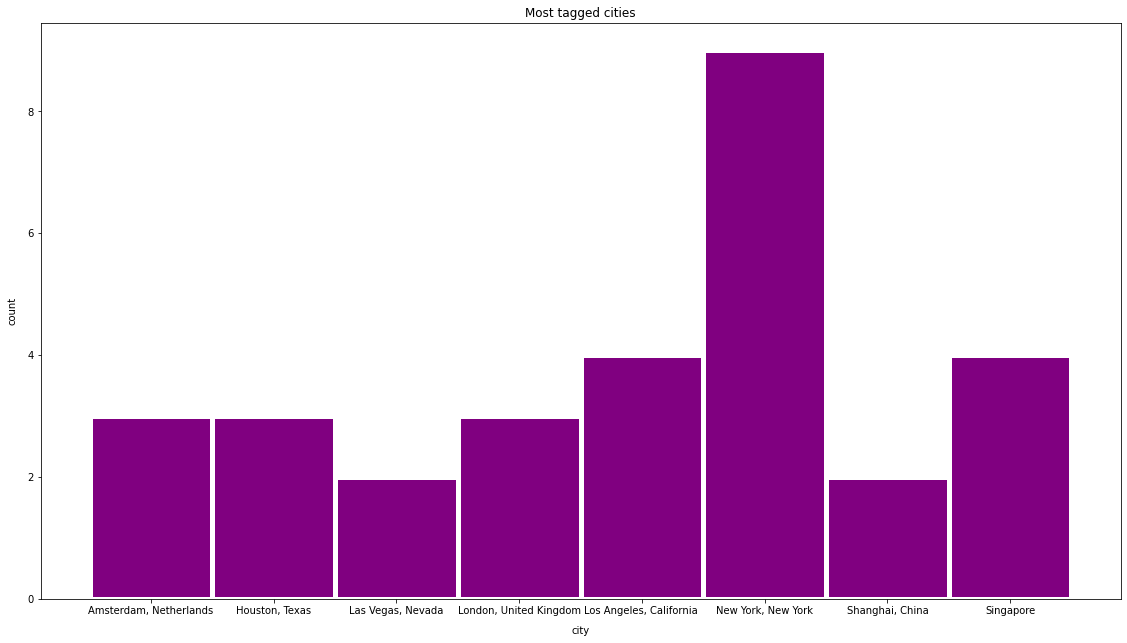

In [53]:
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,2])
ax.bar(city,dd,width=1, edgecolor="white", linewidth=5,color='purple')
plt.xlabel('city',labelpad=10)
plt.ylabel('count',labelpad=10)
plt.title('Most tagged cities')
plt.show()

* The most tagged location by top 10 most influential users is <b>New York</b>, which has been visited 9 times, followed by Los Angeles and Singapore with 4 visits, then Amsterdam,
Houston and London 3 times, and finally Las Vegas and Shangai 2 times.

All the other cities have been visited only once

<b>5.4.1</b> How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents?

* After applying the 'groupby' function to the dataframe containing the most influential users, we notice that we have 141 posts made by them in our posts dataset; 
* Of these posts, <b>128 are pictures-only posts</b>, and <b>13 are reel</b> and <b>0 are with both content</b>.

In [53]:
top10_posts.groupby(['profile_id','post_type'])["numbr_likes"].count()
ptype=top10_posts.groupby(['post_type'])["numbr_likes"].count()
ptype

post_type
1    128
2     13
Name: numbr_likes, dtype: int64

<b>5.4.2</b> Provide the number as percentages and interpret those figures.

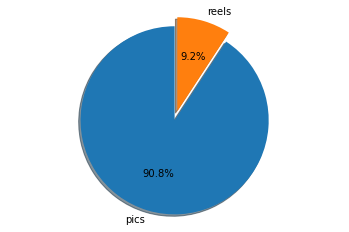

In [54]:
pic=128/141
reel=13/141
pic*100,reel*100

labels = 'pics', 'reels'
sizes = [128,13]
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

* After observing the plot, we can say that pictures-only posts are the vast majority of the total, being <b>90.8%</b>, and reels appear approximately once every 10 posts (<b>9.2%)

<b>5.5</b> How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

* We start by analizing the posts made by the top 10 most influencial users.
* When they post a picture, they get on average 541294 likes and 3883 comments, while when they post reels <b>they get on average 266.524.1 likes and 2.019.8 comments</b>.
Since we don't have data regarding their mixed posts, we can't say what is the average number of likes and comments for those types of posts.

In [57]:
top10_posts.groupby(['post_type'])["numbr_likes"].mean()

post_type
1    541294.015625
2    266524.153846
Name: numbr_likes, dtype: float64

In [56]:
top10_posts.groupby(['post_type'])["number_comments"].mean()

post_type
1    3882.914062
2    2019.846154
Name: number_comments, dtype: float64

* On the other hand, if we analize all the users, with any number of followers, we obviously get smaller outputs for average likes and comments. 
* The average number of likes <b>for a picture-only post</b>, considering all the posts we can analize, is <b>280.6, while for comments is 390.8 </b>.
* <b>For reels, the average likes and comments are 390.8 and 11.2 respectively</b>.
* We can now dispose also of <b>the mixed posts data</b>, and we observe that they receive <b>an average of 194.7 likes and 6.7 comments</b>.
* The biggest difference between the most influential users and all the users, is that they receive more likes and comments on average on only_pictures post, while regular users receive more likes and comments on average on the reels.

In [59]:
df_instagram_posts_RQ5.groupby(['post_type'])["numbr_likes"].mean()

post_type
1    280.659566
2    390.781299
3    194.758812
Name: numbr_likes, dtype: float64

In [58]:
df_instagram_posts_RQ5.groupby(['post_type'])["number_comments"].mean()

post_type
1     7.498260
2    11.179689
3     6.701434
Name: number_comments, dtype: float64

### <b>[RQ7]</b> Of course, calculating probabilities is a job that any Data Scientist must know. So let's compute some engaging figures.

<b>7.1</b> What's the probability that a post receives more than 20% "likes" of the number of followers a user has?

* We create two datasets from the starting ones, one containing the profile ids and number of likes of each post
and the second one ("folid") containing the profile ids and number of followers of each profile.
* We delete the lines that have missing values in followers and number of likes 

In [6]:
# posts dataset
fields=['profile_id','numbr_likes']
df_instagram_posts_RQ7=pd.read_csv('~/instagram_posts.csv',sep='\t',usecols=fields)
df_instagram_posts_RQ7.dropna(subset=['numbr_likes'], inplace=True)

In [12]:
df_instagram_profiles_RQ7=df_instagram_profiles_RQ5.copy()
folid=df_instagram_profiles_RQ7[['followers','profile_id']]
folid.dropna(subset=['followers'], inplace=True)

* We extract those profile_id that are present in both posts dataset and profiles dataset:

In [42]:
dp = df_instagram_profiles_RQ7[df_instagram_profiles_RQ7.profile_id.isin(dpost.profile_id.unique())] #2,207.207
df_instagram_posts_RQ7 = df_instagram_posts_RQ7[df_instagram_posts_RQ7.profile_id.isin(dp.profile_id)] #27,715.738 rows
df_instagram_posts_RQ7 = df_instagram_posts_RQ7.dropna() #25,132.446 rows

* We create a single dataset containing all profiles id with number of likes and followers:

In [28]:
followers_likes_RQ7=pd.merge(dpost,folid, on='profile_id') #24,708.644 rows

* Now, through a "mask" we extract only those values that satisfy our condition, that the number of likes of a post are more than 20% of the profile's follower number:

In [35]:
best_followers_likes_RQ7=followers_likes_RQ7[followers_likes_RQ7.numbr_likes>(followers_likes_RQ7.followers/5)]
best_followers_likes_RQ7 #3,883.291 rows

profile_id  numbr_likes  followers
24        2.237948e+09        253.0     1204.0
54        6.027751e+09         46.0      164.0
55        6.027751e+09         33.0      164.0
56        6.027751e+09         33.0      164.0
57        6.027751e+09         51.0      164.0
...                ...          ...        ...
24708503  2.297958e+09        407.0     1068.0
24708518  5.562025e+09         21.0       96.0
24708522  1.171138e+10       2103.0       13.0
24708628  3.723950e+09        117.0      377.0
24708634  3.602873e+08         76.0      252.0

[3883291 rows x 3 columns]

In [32]:
len(best_followers_likes_RQ7)/len(followers_likes_RQ7)

0.15716325833178058

* After dividing the number of posts that satisfies our condition to the total number of posts considered, <b>we obtain a probability of 15.7%</b> that a post receives more than 20% "likes" of the number of followers a user has

<b>7.2</b> Do users usually return to locations? Extract the probability that a user returns to a site after having posted it in the past. Does that probability make sense to you? Explain why or why not.

* We start by grouping by the post dataset by each profile_id and then by location_id, obtaining how many times each user had been to each location.

In [40]:
pl=dpost.groupby(['profile_id','location_id'])['location_id'].count()
pl

profile_id    location_id 
3.000000e+00  1.000000e+01    1
              5.400000e+01    1
              8.030000e+02    1
              1.526200e+04    1
              2.705200e+04    1
                             ..
9.001013e+13  6.631216e+14    1
              2.075964e+14    1
              1.855425e+14    2
              2.418404e+08    1
9.001014e+13  1.077310e+06    1
Name: location_id, Length: 21096135, dtype: int64

* We count then how many times users have been only once to a location;

In [41]:
pl.value_counts()

1      18134031
2       1662813
3        538694
4        237039
5        136753
         ...   
125           1
214           1
72            1
270           1
124           1
Name: location_id, Length: 106, dtype: int64

The output above shows how many times users visited a location 1,2,3.. ecc. times

* By dividing the places visited only once bt each single user by the total number of locations visited we obtain the probability that a user visits once a location, and subtracting that probability from 1 we obtain the final probability of <b>14%</b> that a user returns to a site after having posted it in the past. 

In [23]:
1-18134031/21096135

0.1404097954435729

* From our point of view, this is a probability that makes sense, because we assume that users want to have profiles <b>rich of different contents</b>, to give other people the idea of having an interesting lifestyle, according to the tendency that people have on social media of "showing-off". That's a possible hypothesis, in our opinion, about <b>why only 14% of the times people post again in the same location.

#### <b>[RQ8]</b>Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check whether a hypothesis is correct or not.

<b>8.3</b> What‚Äôs the distribution of followers? Plot the empirical distribution of followers amongst all users and extract the mean, mode, and quantiles. Interpret those figures.

* We start by plotting the empirical distribution of the followers; we immediatly notice that the distribution is asymmetrical to the right and it resembles an exponential distribution

Text(0.5, 1.0, 'count of followers')

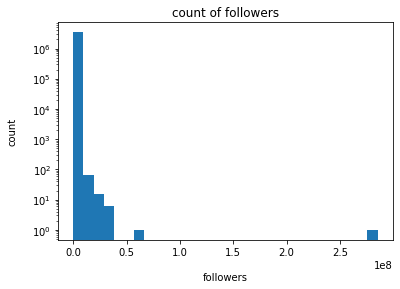

In [32]:
followers.plot(kind='hist',bins=30,logy=True)
plt.xlabel('followers',labelpad=15)
plt.ylabel('count',labelpad=15)
plt.title('count of followers')

* We continue the analysis with a summary of the main characteristics of the distribution. From the table below we can observe that the mean of the followers distribution is 4739.899180, a value that is way closer to the minimun of the distribution (0), than the maximum (285457645), and it's way bigger than the median of the distribution which equals to 406: this indicates as well that the distribution is asymmetrial and that there might be are some big outliers that influence the value of the mean. The first quantile is equal to 159 and the third equals 974, having an inter-quantile range of 815. From the boxplot below we can easily notice the maximum, being a huge outlier. 

<AxesSubplot:>

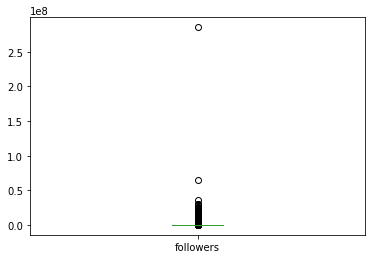

In [34]:
followers.plot(kind='box')

In [10]:
followers.describe().apply(lambda x: format(x, 'f'))

count      3452771.000000
mean          4739.899180
std         193908.709487
min              0.000000
25%            159.000000
50%            406.000000
75%            974.000000
max      285457645.000000
Name: followers, dtype: object

<b>8.4</b> What are histograms, bar plots, scatterplots and pie charts used for?

* An histogram is a graphical representation of a distribution of continuos numerical datas divided in classes, named bins, that can be of different dimentions. It's used to have a graphic representation of the frequency of each class compared to the others.
* The barplot, differently from the histogram, is used to plot cathegorical vriables, and it's used to visualize and compare the frequency of the analyzed phenomenon.
* The scatterplot is a plot that uses cartesian coordinates and it is used to visualize the value of two variables for a set of data. Each value is represented as a dot.
* The pie chart is a graph used to describe numerical proportion of a variable, similarly to the barplot but with a circular form.

<b>8.5</b> What insights can you extract from a Box Plot?

* The box plot is a graph that is used to show the quartiles, max, min, the range, the inter-quantile range, the skeweness and spread of numerical datas. It is also useful to locate outliers that are plotted as dots.